<a href="https://colab.research.google.com/github/aleks-haksly/Simulative/blob/main/SQL/Analitics/part_01/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import text
from sqlalchemy import create_engine
import pandas as pd
from google.colab import userdata

In [ ]:
# Подключаемся к базе postgres на https://supabase.com/
engine = create_engine(userdata.get('supabase'), client_encoding='utf8')

In [ ]:
# пишем функцию-обертку для удобного получения данных в виде pandas df
def select(sql):
    sql = text(sql)
    return pd.read_sql(sql, engine)

## Нужно собрать базу контактов для email-рассылки.
Почта указана абсолютно у всех, а вот имя/
фамилия first_name и last_name - не у всех. В результате нужно
получить 2 поля: email, full_name. Здесь email - почтовый адрес
из базы, а full_name - это имя и фамилия, написанные через
пробел. Причем если имя в базе не указано, то вместо
связки имя фамилия нужно вывести Дорогой друг.


In [ ]:

sql = """
SELECT
  email,
  (CASE WHEN
  coalesce(first_name, '') || ' ' || coalesce(last_name, '') = ' ' then 'Дорогой друг'
  else coalesce(first_name, '') || ' ' || coalesce(last_name, '') end) AS full_name
FROM simulative.user
"""
data = select(sql)

In [ ]:
data

,email,full_name
0,jbsnjbf@gmail.com,Дорогой друг
1,fjbis@yandex.ru,Элина Полякова
2,jjxbfox@bk.ru,Эмилия Афанасьев
3,isfsobm.nseo@gmail.com,Дорогой друг
4,koonbnanojj.jofbx@yandex.ru,Эмилия Фролова
...,...,...
2769,bb.jk@bk.ru,Илья Иван
2770,nbjsbjds@mail.ru,Яна Сухарева
2771,cookboo@gmail.com,Артём Хохлова
2772,fdsnbfo@example.org,Дорогой друг


К сожалению, мы можем рассылать письма не на все почтовые
серверы. Нужно произвести валидацию почтовых адресов:
адрес должен быть либо в российской доменной зоне `.ru`, либо
на домене `gmail.com`. Остальные ящики, к сожалению, не
сработают. В результате нужно вывести отфильтрованный
столбец `email`.


In [ ]:
sql = """
SELECT
  email,
  (CASE WHEN
  coalesce(first_name, '') || ' ' || coalesce(last_name, '') = ' ' then 'Дорогой друг'
  else coalesce(first_name, '') || ' ' || coalesce(last_name, '') end) AS full_name
FROM simulative.user
WHERE email LIKE '%@%.ru' OR email LIKE '%@gmail.com'
"""
data = select(sql)

In [ ]:
data

,email,full_name
0,jbsnjbf@gmail.com,Дорогой друг
1,fjbis@yandex.ru,Элина Полякова
2,jjxbfox@bk.ru,Эмилия Афанасьев
3,isfsobm.nseo@gmail.com,Дорогой друг
4,koonbnanojj.jofbx@yandex.ru,Эмилия Фролова
...,...,...
2553,dsbobenob@mail.ru,Даниил Гончарова
2554,abd-mbmb@ya.ru,Константин Хохлова
2555,bb.jk@bk.ru,Илья Иван
2556,nbjsbjds@mail.ru,Яна Сухарева


## Классификация пользователей
На платформе у нас есть внутренняя классификация
пользователей. Она зависит от значения `score` - баллы, которые
пользователь получает за решение задач. Нужно написать
запрос, в котором будут столбцы `email`, `score`, `class`.

Поле `class` должно вычисляться так:
* если у пользователя` 0 <= score < 20 - группа D;
* если 20 <= score < 100 - группа C;
* если 100 <= score < 500 - группа B;
* если больше 500 - группа A.

Нам это важно знать, чтобы предложить пользователю нужную
активность.

In [ ]:
sql = """
SELECT
  email,
  score,
  (
    CASE
      WHEN score < 20 THEN 'D'
      WHEN score < 100 THEN 'C'
      WHEN score < 500 THEN 'B'
      ELSE 'A'
    END
  ) as class
FROM
  simulative.user
"""
data = select(sql)

In [ ]:
data

,email,score,class
0,jbsnjbf@gmail.com,0,D
1,fjbis@yandex.ru,0,D
2,jjxbfox@bk.ru,0,D
3,isfsobm.nseo@gmail.com,0,D
4,koonbnanojj.jofbx@yandex.ru,0,D
...,...,...,...
2769,bb.jk@bk.ru,120,B
2770,nbjsbjds@mail.ru,0,D
2771,cookboo@gmail.com,25,C
2772,fdsnbfo@example.org,0,D


Выведите полную информацию о тех пользователях, которые
зарегистрировались между 1 и 10 апреля включительно. Это
был период активной рекламной кампании, поэтому для этих
ребят будет вообще отдельное предложение - скорее всего,
сейчас мы не будем их теребить рассылками

In [ ]:
# если не приводить date_joined к дате, то из-за налаичия в дате времени условие будет до 11 апреля
sql = """
SELECT
  *
FROM
  simulative.user
where date_joined::date BETWEEN '2021-04-01' AND '2021-04-10'
-- where date_joined BETWEEN '2021-04-01' AND '2021-04-11'
"""
data = select(sql)

In [ ]:
data

,id,username,first_name,last_name,is_active,date_joined,email,referal_user,company_id,tier,score
0,3,ebxnsomo,Никита,Петров,True,2021-04-10 10:14:22+00:00,nsomo@bk.ru,None,None,1,95
1,10,xsnascsxsna,Ульяна,Булатов,True,2021-04-05 15:50:36+00:00,xsnascsxsna@yandex.ru,None,None,1,0
2,14,mmbdobabnbm2,Андрей,Макаров,True,2021-04-01 16:46:06+00:00,dsnaodexs@gmail.com,None,None,1,0
3,16,snnbojbxsfb,Ольга,Васильев,True,2021-04-01 02:35:41+00:00,snnbojbxsfb@yandex.ru,None,None,1,15
4,4,LsooSioesbdK,София,Ермаков,True,2021-04-06 12:50:57+00:00,1583253@gmail.com,None,None,1,0


Напишите запрос, в котором будет видно, сколько дней прошло
с момента регистрации каждого пользователя до текущего
момента.

* Ответ должен содержать столбцы `email, date_joined, diff` в днях.

Важно - разница должна считаться не от дня, в который вы решаете задачу, а от
произвольного дня. Если я буду проверять через 3 дня - запрос
это должен учитывать.

In [ ]:
sql = """
SELECT
  email,
  date_joined,
  date_part('days', (now() - date_joined)) :: int as diff
FROM
  simulative.user
"""
data = select(sql)

In [ ]:
data

,email,date_joined,diff
0,jbsnjbf@gmail.com,2021-11-23 13:58:52.051036+00:00,1009
1,fjbis@yandex.ru,2021-09-01 12:04:31.148715+00:00,1092
2,jjxbfox@bk.ru,2021-12-12 07:03:00.583264+00:00,991
3,isfsobm.nseo@gmail.com,2022-01-02 12:22:43.014039+00:00,969
4,koonbnanojj.jofbx@yandex.ru,2021-04-22 15:37:33+00:00,1224
...,...,...,...
2769,bb.jk@bk.ru,2022-03-03 19:41:33.865225+00:00,909
2770,nbjsbjds@mail.ru,2022-04-01 12:31:14.559731+00:00,880
2771,cookboo@gmail.com,2022-04-08 21:01:54.011350+00:00,873
2772,fdsnbfo@example.org,2022-04-21 10:58:08.609494+00:00,861


У нас в разных проектах люди зачастую оставляют левую почту и мы не можем с ними
связаться, даже после регистрации.

Хотим проверить гипотезу - насколько часто юзернейм (то есть логин) совпадает с началом почты, которое идет до @.

Поэтому нужно написать запрос, который
«отрубает» доменное имя и собачку и сравнивает это с
полем username.

Естественно, регистр букв учитывать не нужно. В
результате хотелось бы видеть 3 поля:
* username,
* email_trunc - обрезанная почта,
* isEqual - одинаковые ли они.

Посчитаем, сколько совпадений наберется

In [ ]:
sql = """
SELECT sum(isEqual::int) FROM
(SELECT
  username,
  --substring(email from 1 for position('@' in email) - 1) as email_trunc,
  --username = left(email, position('@' in email) - 1) as isEqual (альтернативно),
  username = substring(email from 1 for position('@' in email) - 1) as isEqual
FROM
  simulative.user) as t
"""
data = select(sql)

## Задание 2
Построить график Retention. По условию не заданы контрольные точки (n-days,
помните?), поэтому мы будем вести расчет не для 1, 3, 7 и так далее дня, а для
всех, по которым у нас есть данные.


In [111]:
df = pd.read_csv('/content/retention_data.csv', sep=';')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [112]:
df = df.merge(df.groupby('user_id')['date'].min(), on='user_id', how='left')

In [114]:
df['date_diff'] = (df['date_x'] - df['date_y']).dt.days

In [120]:
retention_df = df.groupby('date_diff').agg({'user_id': 'count'})

In [122]:
retention_df['count_%'] = retention_df['user_id'] / retention_df['user_id'].max()

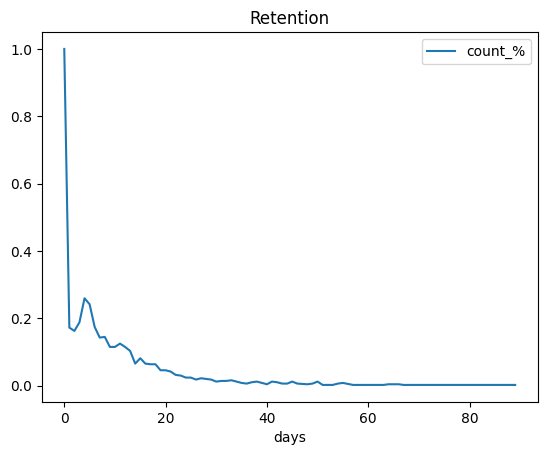

In [128]:
retention_df.plot(y='count_%', title='Retention', xlabel='days');